In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('october_route_ridership.csv')

In [3]:
df = df.dropna()

In [4]:
df

,_id,route,ridership_route_code,route_full_name,current_garage,mode,month_start,year_month,day_type,avg_riders,day_count
0,1,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,SAT.,969.500000,4
1,2,4,004,4 - TROY HILL,Ross,Bus,2017-01-01,201701,SAT.,218.250000,4
2,3,6,006,6 - SPRING HILL,Ross,Bus,2017-01-01,201701,SAT.,495.500000,4
3,4,8,008,8 - PERRYSVILLE,Ross,Bus,2017-01-01,201701,SAT.,1480.000000,4
4,5,11,011,11 - FINEVIEW,Ross,Bus,2017-01-01,201701,SAT.,208.000000,4
...,...,...,...,...,...,...,...,...,...,...,...
11374,11375,RED,RED,RED - Castle Shannon via Beechview,South Hills Village,Rail,2021-01-01,202101,WEEKDAY,1947.600000,20
11375,11376,SLVR,SLVR,SLVR - Libary via Overbrook,South Hills Village,Rail,2021-01-01,202101,WEEKDAY,892.550000,20
11376,11377,MI,000,MONONGAHELA INCLINE,Incline,Incline,2021-01-01,202101,SAT.,630.600000,5
11377,11378,MI,000,MONONGAHELA INCLINE,Incline,Incline,2021-01-01,202101,SUN.,262.166667,6


In [5]:
df['month_start'] = pd.to_datetime(df['month_start'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11261 entries, 0 to 11378
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   _id                   11261 non-null  int64         
 1   route                 11261 non-null  object        
 2   ridership_route_code  11261 non-null  object        
 3   route_full_name       11261 non-null  object        
 4   current_garage        11261 non-null  object        
 5   mode                  11261 non-null  object        
 6   month_start           11261 non-null  datetime64[ns]
 7   year_month            11261 non-null  int64         
 8   day_type              11261 non-null  object        
 9   avg_riders            11261 non-null  float64       
 10  day_count             11261 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [7]:
df['route_full_name'].nunique()

102

In [8]:
df['route_full_name'].unique()

array(['1 - FREEPORT ROAD', '4 - TROY HILL', '6 - SPRING HILL',
       '8 - PERRYSVILLE', '11 - FINEVIEW', '12 - MCKNIGHT',
       '13 - BELLEVUE', '14 - OHIO VALLEY', '15 - CHARLES',
       '16 - BRIGHTON', '17 - SHADELAND', '21 - CORAOPOLIS', '22 - MCCOY',
       '24 - WEST PARK', '26 - CHARTIERS', '27 - FAIRYWOOD',
       '28X - AIRPORT FLYER', '31 - BRIDGEVILLE', '38 - GREEN TREE',
       '39 - BROOKLINE', '40 - MOUNT WASHINGTON', '41 - BOWER HILL',
       '43 - BAILEY', '44 - VIA KNOXVILLE', '48 - ARLINGTON',
       '51 - CARRICK', '53 - HOMESTEAD PARK',
       '54 - NORTH SIDE-OAKLAND-SOUTH SIDE', '55 - GLASSPORT',
       '56 - LINCOLN PLACE', '57 - HAZELWOOD', '58 - GREENFIELD',
       '59 - MON VALLEY', '61A - NORTH BRADDOCK',
       '61B - BRADDOCK-SWISSVALE', '61C - MCKEESPORT-HOMESTEAD',
       '61D - MURRAY', '64 - LAWRENCEVILLE - WATERFRONT',
       '67 - MONROEVILLE', '69 - TRAFFORD', '71A - NEGLEY',
       '71B - HIGHLAND PARK', '71C - POINT BREEZE', '71D - HAMILTON',
  

In [9]:
def get_name_from_number(num):
    num = str(num)
    for name in df['route_full_name'].unique():
        if num in name:
            return name

In [10]:
get_name_from_number(86)

'86 - LIBERTY'

In [21]:
def get_agg_graph(route):
    temp_df = df[df['route_full_name']==route]
    temp_df.groupby(['month_start'])['avg_riders'].mean().plot(title=f'Average ridership for {route}')

In [22]:
def get_timeseries_graph(route):
    temp_df = df[(df['route_full_name']==route)]
    
    plt.plot(temp_df[temp_df['day_type'] == 'WEEKDAY']['month_start'], temp_df[(temp_df['day_type']=='WEEKDAY')]['avg_riders'], label='Weekday')
    plt.plot(temp_df[temp_df['day_type'] == 'SAT.']['month_start'], temp_df[(temp_df['day_type']=='SAT.')]['avg_riders'], label='Saturday')
    plt.plot(temp_df[temp_df['day_type'] == 'SUN.']['month_start'], temp_df[(temp_df['day_type']=='SUN.')]['avg_riders'], label='Sunday')
    plt.legend()
    plt.xticks(rotation=45)
    plt.ylim(0, (temp_df['avg_riders'].max() * 1.10))
    plt.title(f"Monthly average ridership for {route}")
    plt.tight_layout()
    max_riders = temp_df['avg_riders'].max()
    y_ticks = np.arange(0, max_riders + 500, 500)  # Create y-ticks at intervals of 500
    for y in y_ticks:
        plt.axhline(y=y, color='gray', linestyle='--', linewidth=.9)  # Add dotted line
    plt.show()

In [23]:
def get_pandemic_dropoff():
    return 

#### 54

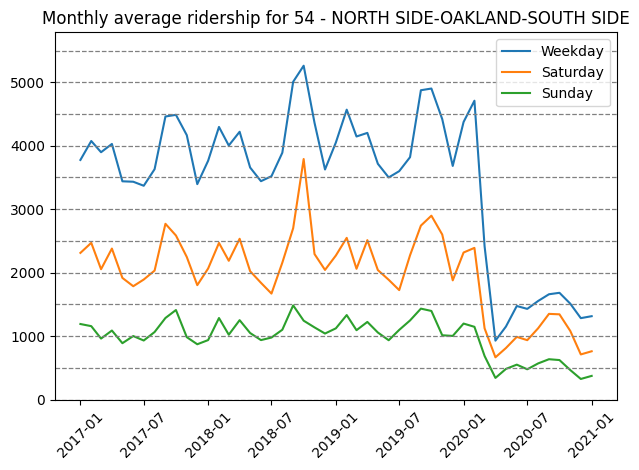

In [24]:
get_timeseries_graph(get_name_from_number(54))

#### 86 -> D86

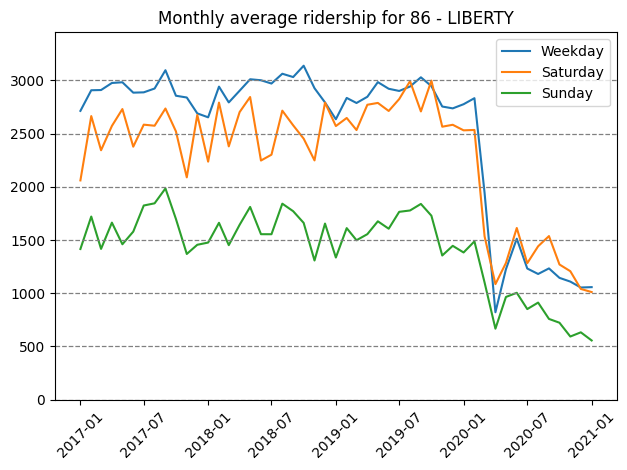

In [25]:
get_timeseries_graph(get_name_from_number(86))

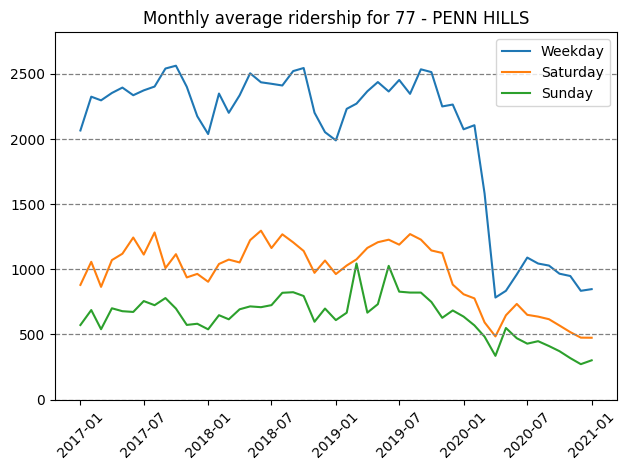

In [26]:
get_timeseries_graph(get_name_from_number(77))

#### 87 -> D87

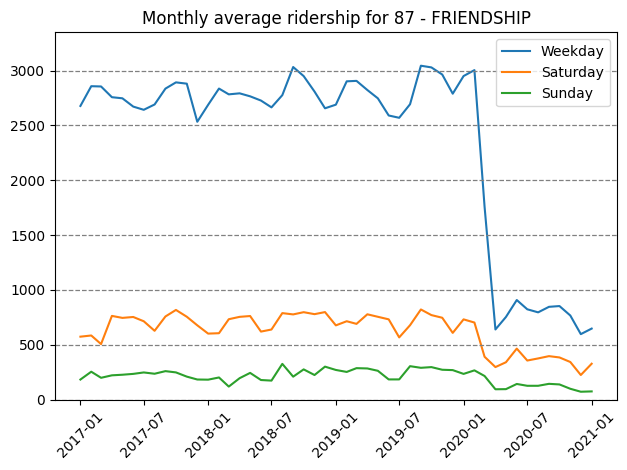

In [27]:
get_timeseries_graph(get_name_from_number(87))

#### 88 -> D88

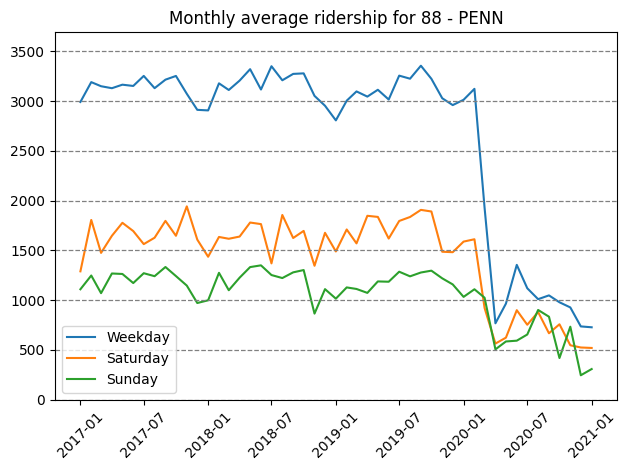

In [28]:
get_timeseries_graph(get_name_from_number(88))

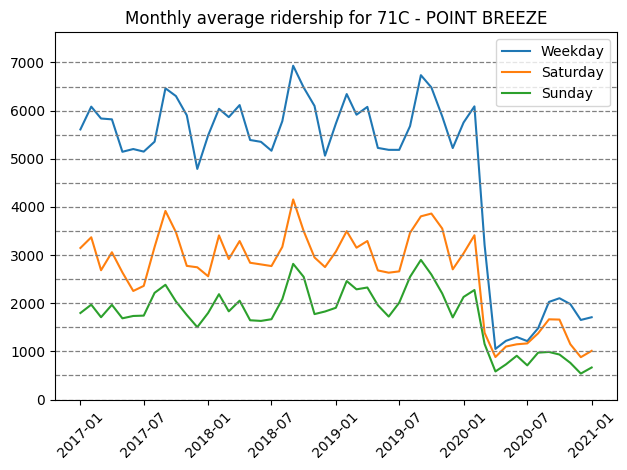

In [29]:
get_timeseries_graph(get_name_from_number('71C'))

#### 91 -> 91D

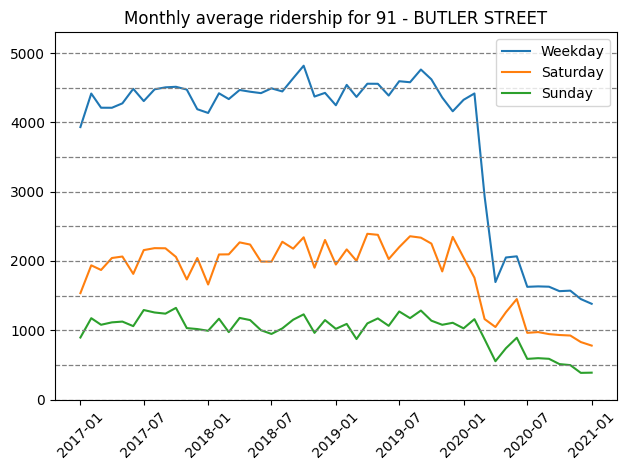

In [30]:
get_timeseries_graph(get_name_from_number(91))